## **By: Yung Siang**
## **Prediction using supervised ML**
Students' scores are predicted w.r.t number of studies hours

### **Simple Linear Regression**
Simple linear regression is used due to low number of independent variables

In [1]:
#Import all required libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import all required libs
from sklearn import model_selection
from sklearn import linear_model

In [3]:
#Data in csv is read
df=pd.read_csv('C:\\Users\\student_scores - student_scores.csv')
print("Data loaded successfully ")
df.head(10)

Data loaded successfully 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#Check the size/shape of data structures
df.shape

(25, 2)

In [5]:
#Check the columns available
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
#Group by the same number of hours average mean scores
df.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

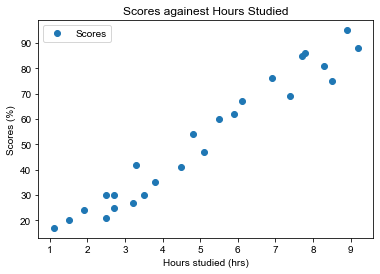

In [7]:
#Plot for scores against number of studies hours
df.plot(x='Hours', y='Scores', style='o')  
sns.set_theme(color_codes=True)
plt.title("Scores againest Hours Studied")
plt.xlabel("Hours studied (hrs)")
plt.ylabel("Scores (%)")
plt.show()

**It can be seen where there exist correlation where the scores obtained increase with the increase in number of studies hours.**

In [8]:
# Splitting into independent variable (x) and dependent variable (y)
X = df.iloc[:, :1].values
y = df.iloc[:, 1].values
print('length of x:', len(X), '\nlength of y:', len(y))

length of x: 25 
length of y: 25


In [9]:
#Allocating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print('Successfully allocated')


Successfully allocated


In [10]:
#Use linear regression to train the model
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [11]:
#Fitting the training sets (x & y) into model
clf = clf.fit(X_train, y_train)

In [12]:
#Equation for regression line
Reg_Eq = clf.coef_*X_train + clf.intercept_ 

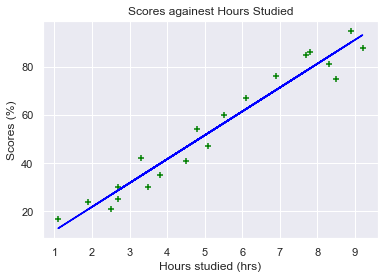

In [13]:
#Visualizing the trained model and fitted linear regression equation
plt.scatter(X_train,y_train,color='green',marker='+')
plt.plot(X_train,Reg_Eq,color='blue')
plt.title("Scores againest Hours Studied")
plt.xlabel("Hours studied (hrs)")
plt.ylabel("Scores (%)")
plt.show()

In [14]:
#Predicting using trained linear regression model for the test sets 
y_predict = clf.predict(X_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
#Inspecting test sets
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [16]:
#Compare between actual test sets and predicted sets
df_pred_test = pd.DataFrame({'Hours': X_test.squeeze(), 'Actual_Scores': y_test.squeeze(), 'Predicted_Scores': y_predict.round(2).squeeze()})
df_pred_test

,Hours,Actual_Scores,Predicted_Scores
0,1.5,20,16.88
1,3.2,27,33.73
2,7.4,69,75.36
3,2.5,30,26.79
4,5.9,62,60.49


In [17]:
#Import libs for errors calculation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
rsq = r2_score(y_test, y_predict)

In [19]:
#Inspecting computed errors 
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'rsq : {rsq:.4f}')

Mean absolute error: 4.18
Mean squared error: 21.60
Root mean squared error: 4.65
rsq : 0.9455


In [20]:
#Predicting scores for 9.25 hours of studies
Hours = np.array([[9.25]])
predicted_9 = clf.predict(Hours)
predicted_9.round(2)

array([93.69])